In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
sns.set_style('whitegrid', {'axes.grid' : False})
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn

## Oakland CrimeWatch Data

In [2]:
crime2013 = pd.read_csv("Crimewatch_Data_2013.csv")
crime2014 = pd.read_csv("Crime_Data_2014.csv")
crime2015 = pd.read_csv("Crime_Data_2015.csv")

C:\Users\pjhu\Anaconda3\envs\ds100_new\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,Location,year
29,ROBBERY,01/01/2043 11:43:00 AM,12-003884,"ROBBERY - STRONG ARM (HANDS, FISTS, FEET, ETC.)",19X,501 E 12TH ST,None
28,ROBBERY,01/01/2043 11:43:00 AM,12-003884,FORCE/ADW-OTHER DANGEROUS WEAPON:GBI,19X,501 E 12TH ST,None
27,ROBBERY,01/01/2043 11:43:00 AM,12-003884,ASSAULT WITH CAUSTIC CHEMICAL/ETC,19X,501 E 12TH ST,None
20,PETTY THEFT,01/03/2053 01:53:00 PM,12-011991,THEFT,06X,1020 39TH ST,None
4,DOMESTIC VIOLENCE,01/09/2034 07:34:00 PM,12-036984,DOMESTIC DISPUTE,09X,4281 PIEDMONT AV,None
9,FORCIBLE RAPE,08/19/2019 11:30:00 PM,12-042296,SC RAPE,12Y,5227 CLAREMONT AV,None
21,PROSTITUTION,02/01/2031 09:31:00 PM,12-043679,DISORDERLY CONDUCT:PROSTITUTION,20X,MITCHELL ST @ INTERNATIONAL BLVD,None
12,MISDEMEANOR ASSAULT,01/05/2037 03:37:00 PM,12-048613,BATTERY,03X,14TH ST & BROADWAY,None
17,OTHER,01/09/2030 07:30:00 PM,12-048836,DOGS AT LARGE,33X,9725 INTERNATIONAL BLVD,None
5,DOMESTIC VIOLENCE,01/06/2047 04:30:00 PM,12-055264,BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,14X,303 LEE ST,None


In [160]:
# crime2013['real datetime'] = pd.Series(pd.to_datetime(crime2013['DATETIME']), format='%m%d%y', errors='ignore')
# crime2013['year'] = ''
# for i in range(len(crime2013['DATETIME'])):
#     if '2011' in crime2013['DATETIME'][i]: 
#         crime2013['year'][i] = 2011
#     elif '2012' in crime2013['DATETIME'][i]: 
#         crime2013['year'][i] = 2012
#     elif '2013' in crime2013['DATETIME'][i]:
#         crime2013['year'][i] = 2013
#     else: 
#         crime2013['year'][i] = np.NaN
# crime2013

In [195]:
def extract_year(table,col_name): 
    for i in table[col_name].index:
        table.loc[i, 'year'] = datetime.datetime.strptime(table[col_name].loc[i], '%m/%d/%Y %H:%M:%S %p').year
    return table

In [146]:
actual_2013 = extract_year(crime2013)
#extract_year(crime2014) 
#2014 only contains 45 rows of data and is thus excluded from the data analysis 
actual_2015 = extract_year(crime2015)

In [156]:
actual_2013.groupby('year').count() 
#2012 and 2013 seem to be the only two years that have somewhat consistent data (71790 rows and 71014 rows)
len(actual_2013[actual_2013['year'] == 2012])
len(actual_2013[actual_2013['year'] == 2013])
actual_2015.groupby('year').count() 
#2015 seems to be accurate with 80221 rows of data

,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,LOCATION,CITY,STATE
year,,,,,,,,
2015.0,80221,80221,80221,80120,79660,80140,80221,80221


In [165]:
d = {'2012 crime': actual_2013[actual_2013['year'] == 2012].groupby('CRIMETYPE').count()['DATETIME'], \
     '2013 crime': actual_2013[actual_2013['year'] == 2013].groupby('CRIMETYPE').count()['DATETIME'], \
     '2015 crime': actual_2015.groupby('CRIMETYPE').count()['DATETIME']}
crime_count_total = pd.DataFrame(data=d)
crime_count_total['avg'] = crime_count_total.mean(axis=1)
crime_count_total

,2012 crime,2013 crime,2015 crime,avg
ARSON,192.0,136.0,200.0,176.000000
ATTEMPTED RAPE,7.0,1.0,10.0,6.000000
BOMB,1.0,NaN,NaN,1.000000
BRANDISHING,11.0,15.0,15.0,13.666667
BURG - AUTO,6840.0,6977.0,8104.0,7307.000000
BURG - COMMERCIAL,757.0,636.0,562.0,651.666667
BURG - OTHER,240.0,193.0,188.0,207.000000
BURG - RESIDENTIAL,5084.0,4249.0,2720.0,4017.666667
CHILD ABUSE,13.0,22.0,49.0,28.000000
CURFEW & LOITERING,53.0,84.0,154.0,97.000000


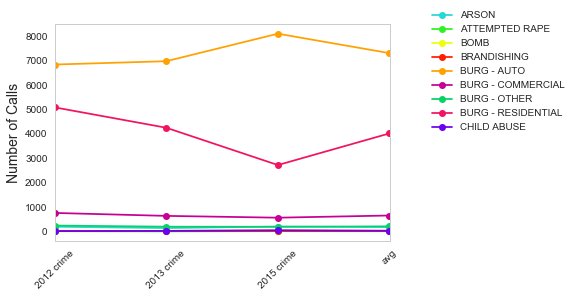

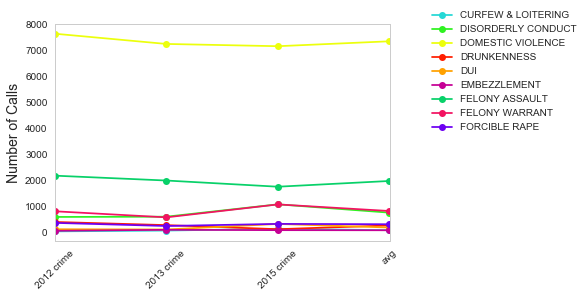

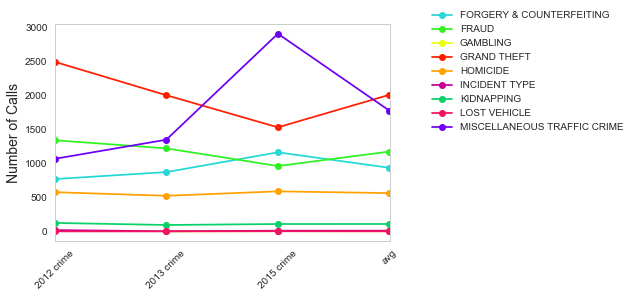

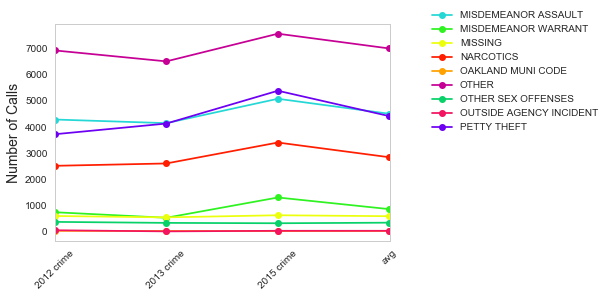

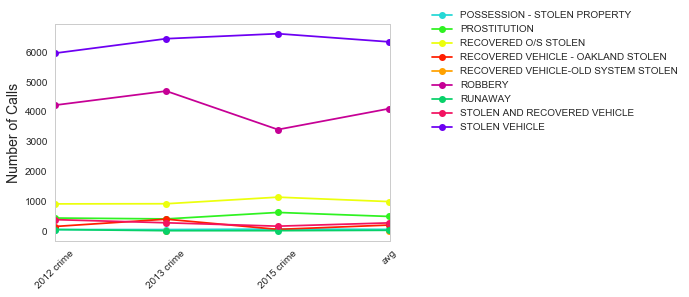

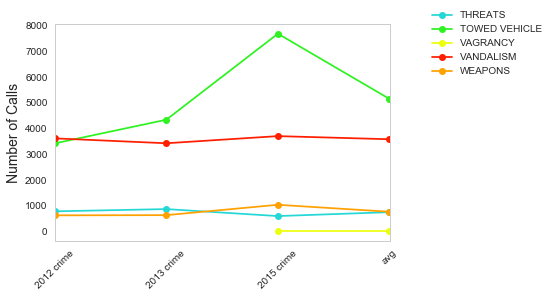

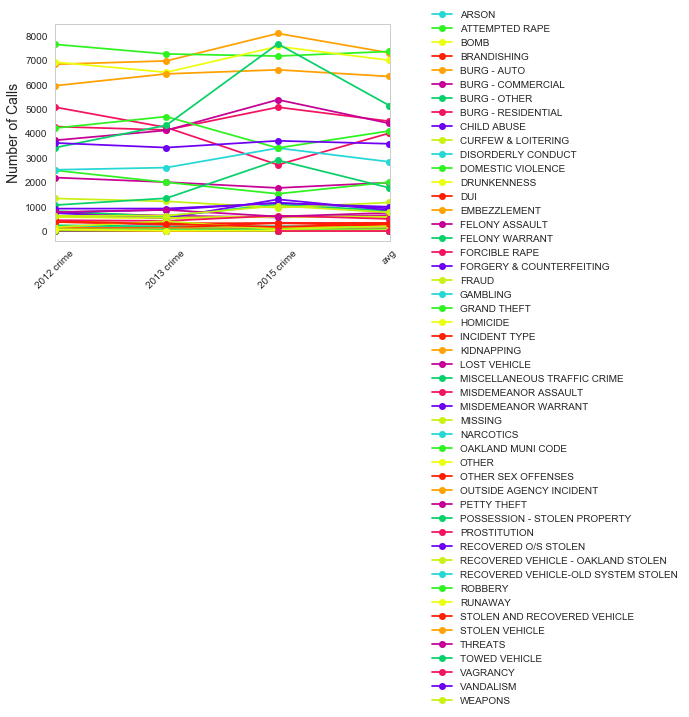

In [240]:
col_list = ["#25D8D6", "#2FF221", "#ECFF0D", "#FF1E00", "#FFA100", "#C60095", '#08d169',\
            '#f21361', '#6d00f2', '#c9f112']
#subplot 1
with sns.color_palette(col_list):
    ax = crime_count_total[:9].T.plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('Number of Calls', fontsize=14)

#subplot 2 
with sns.color_palette(col_list):
    ax = crime_count_total[9:18].T.plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('Number of Calls', fontsize=14)

#subplot 3
with sns.color_palette(col_list):
    ax = crime_count_total[18:27].T.plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('Number of Calls', fontsize=14)

#subplot 4
with sns.color_palette(col_list):
    ax = crime_count_total[27:36].T.plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('Number of Calls', fontsize=14)

#subplot 5
with sns.color_palette(col_list):
    ax = crime_count_total[36:45].T.plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('Number of Calls', fontsize=14)

#subplot 6 
with sns.color_palette(col_list):
    ax = crime_count_total[45:].T.plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('Number of Calls', fontsize=14)

#all together 
with sns.color_palette(col_list):
    ax = crime_count_total.T.plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.ylabel('Number of Calls', fontsize=14)

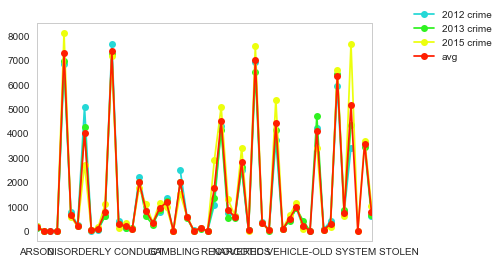

In [239]:
fig = plt.figure(figsize=(10, 8))
with sns.color_palette(col_list):
    ax = crime_count_total.plot(kind='line', marker='o')


## Berkeley CrimeWatch Data 

In [192]:
berk = pd.read_csv('Berkeley_PD_Calls_For_Service.csv')

In [198]:
crime_berk = extract_year(berk, 'EVENTDT')

In [202]:
crime_berk.groupby('year').count()
# both data sets seem to have similar amounts of data. Maybe check the datetime start and end on each of the years?
# 2017 isn't over yet so this data seems to be partial


,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
year,,,,,,,,,,,
2016.0,2442,2442,2442,2442,2442,2442,2442,2442,2436,2442,2442
2017.0,2879,2879,2879,2879,2879,2879,2879,2879,2873,2879,2879


In [203]:
create_berk_df = pd.DataFrame({'2016': crime_berk[crime_berk['year'] == 2016].groupby('OFFENSE').count()['CASENO'],\
                              '2017': crime_berk[crime_berk['year'] == 2017].groupby('OFFENSE').count()['CASENO']})

In [208]:
create_berk_df['% increase'] = ((create_berk_df['2017']-create_berk_df['2016'])/create_berk_df['2016'])*100

In [209]:
create_berk_df

,2016,2017,% increase
2ND RESPONSE,13.0,34.0,161.538462
ALCOHOL OFFENSE,81.0,86.0,6.172840
ARSON,1.0,4.0,300.000000
ASSAULT/BATTERY FEL.,35.0,30.0,-14.285714
ASSAULT/BATTERY MISD.,126.0,136.0,7.936508
BRANDISHING,9.0,21.0,133.333333
BURGLARY AUTO,445.0,539.0,21.123596
BURGLARY COMMERCIAL,37.0,63.0,70.270270
BURGLARY RESIDENTIAL,130.0,150.0,15.384615
DISTURBANCE,171.0,215.0,25.730994


(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.]),
 <a list of 8 Text xticklabel objects>)

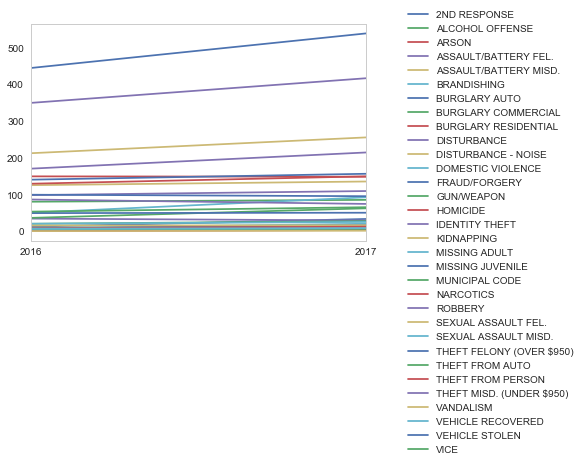

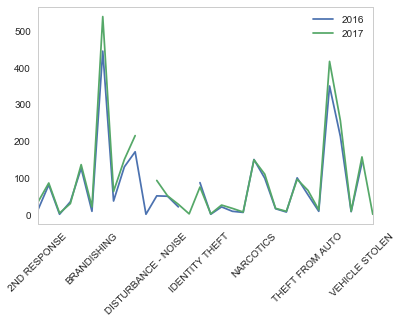

In [222]:
create_berk_df.iloc[:, :2].T.plot(kind='line')
plt.legend(bbox_to_anchor=(1.1, 1.1))

create_berk_df.iloc[:, :2].plot(kind='line')
plt.xticks(rotation=45)